**Predicting Usage of a Video Game Research Server**

This project focuses on a dataset collected from a minecraft server that study how players interact with the game. Unfortunately, the research team in charge of this study is having difficulty attracting the right audience and maintaining enough resources, time, and money to handle the player capacity. The team set up a game-related newsletter to try to attract and identify certain players who are more likely to engage with this study. This leads us to the question, is it possible to predict the likelihood of a player signing up for game-related newsletter subscription based on characteristics and behavior?

The dataset used for this analysis was players.csv and contains a list of different characteristics of each player.
Dataset summary: The players.csv dataset contains 196 rows and the are the main variables used for this study are experience, played_hours, age, gender (characteristics) and subscribe (target variable). hashedEmail and name are excluded from this study as these variables are not likely to influence subscription behavior.

experience: Player skill level

played_hours: How often a player plays the game

Age: Can affect subscription engagement 

gender: May influence subscription behavior

subscribe: Records whether a player subscribed to a newsletter. This is the main target vairable for prediction.


In [1]:
library(tidyverse)
library(tidymodels)
library(lubridate)
library(repr)
library(RColorBrewer)
library(readxl)
library(yardstick)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
#first, download and open the csv file to the dataset
players_data <- read_csv("players.csv")
players_data

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17


This is the data we obtained from downloading the dataset. However, because we are not using all of these variables, we can remove a few columns to clean up our data. We only need to keep the Age, played_hours and subscribe columns since those are the variables of interest in our study so we can remove everything else. We use filter(!is.na(Age)) to filter out players who dont have age recorded and we use the mutate and as_factor function to change subscribe to a factor.

In [44]:
players_clean <- players_data|>
select(-hashedEmail, -name, -experience, -gender) |>
filter(!is.na(Age)) |>
mutate(subscribe = as_factor(subscribe))
players_clean

subscribe,played_hours,Age
<fct>,<dbl>,<dbl>
TRUE,30.3,9
TRUE,3.8,17
FALSE,0.0,17
TRUE,0.7,21
TRUE,0.1,21
TRUE,0.0,17
TRUE,0.0,19
FALSE,0.0,21
TRUE,0.1,17


Now that we have cleaned up our data, we can plot a graph to see if there is any relationship between our variables.

In [46]:
players_scaled <- players_clean|> 
mutate(scaled_age = scale(Age, center = TRUE), 
       scaled_hours = scale(played_hours, center = TRUE))
players_scaled

subscribe,played_hours,Age,scaled_age,scaled_hours
<fct>,<dbl>,<dbl>,"<dbl[,1]>","<dbl[,1]>"
TRUE,30.3,9,-1.86578776,0.85603962
TRUE,3.8,17,-0.57017138,-0.07385234
FALSE,0.0,17,-0.57017138,-0.20719534
TRUE,0.7,21,0.07763681,-0.18263216
TRUE,0.1,21,0.07763681,-0.20368631
TRUE,0.0,17,-0.57017138,-0.20719534
TRUE,0.0,19,-0.24626729,-0.20719534
FALSE,0.0,21,0.07763681,-0.20719534
TRUE,0.1,17,-0.57017138,-0.20368631


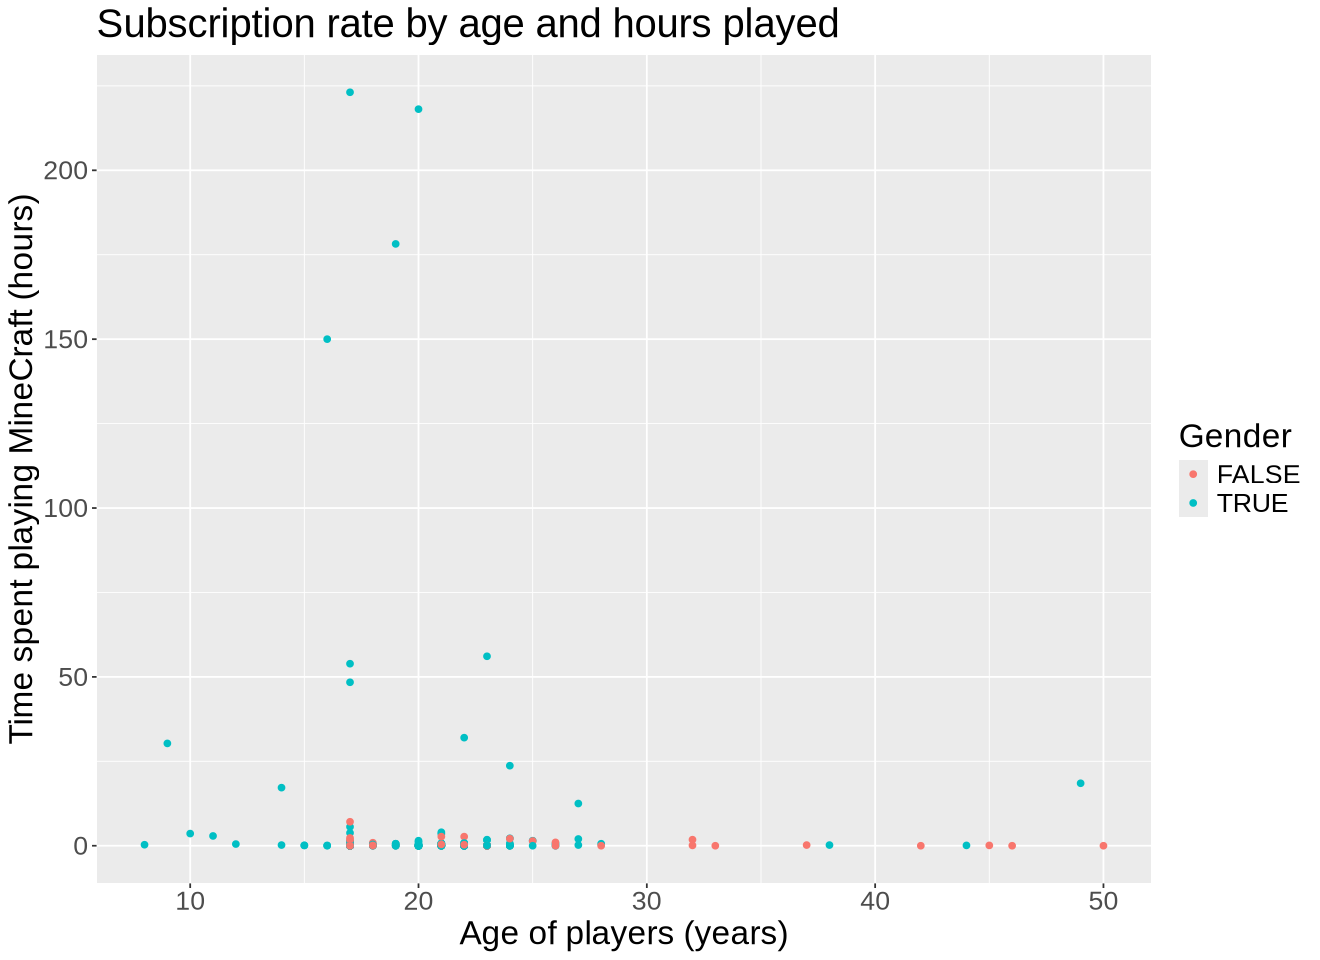

In [47]:
options(repr.plot.height = 8, repr.plot.width = 11)

players_plot <- players_scaled |>
ggplot(aes(x = Age, y = played_hours, color = subscribe)) +
geom_point()+
labs(x = "Age of players (years)", y = "Time spent playing MineCraft (hours)", color = "Gender")+
ggtitle("Subscription rate by age and hours played")+
theme (text =element_text (size = 20))

players_plot

Figure 1: From this plot see that most Minecraft players are generally younger and most of them lie in around the 10-30 range. We can also see a postitive relationship between players subscribed and playing hours. As Play hours increases, players are generally more likely to subscribe. We can also see another relationship, where as age increases player subscription decreases.

Now we can start by building our model by spliting our data into training and testing datasets. We wil use a proportion of 75% training data and 25% testing data and perform a 5-fold cross validation. After preprocessing our data and creating a recipe which standardizes all predictors, we can create a model and tune it to find the best k value. We will use a k value range from 1 to 20. After, we will add our recipe and model through a workflow and filter for accuracy

This method is appropriate because it will ensure that proportion of subscribed  and non-subscribed players remains constant in both training and testing sets. Using 5-fold cross validation will evaluate the performance of the training set across each fold, which will improve accuracy by making our model balanced. Standardizing our data will ensure that both variables how equal weight over each other. Lastly, tuning our k value will help us find the optimal number of neighbors for a higher estimated accuracy.

In [49]:
set.seed(2025)
players_split <- initial_split(players_clean, prop = 0.75, strata = subscribe)
players_train <- training(players_split)
players_test <- testing(players_split)

players_recipe <- recipe(subscribe ~ Age + played_hours, data = players_train) |>
step_scale(all_predictors()) |>
step_center(all_predictors())

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
set_engine("kknn") |>
set_mode("classification") 

players_folds <- vfold_cv(players_train, v = 5, strata = subscribe)

k_vals = tibble(neighbors = seq(from = 1, to = 20, by = 1)) 

knn_fit <- workflow() |>
  add_recipe(players_recipe) |>
  add_model(knn_spec)|>
tune_grid(resamples = players_folds, grid = k_vals) |>
collect_metrics()

accuracies <- knn_fit |>
filter(.metric == "accuracy")

accuracies

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.5586700,5,0.019414805,Preprocessor1_Model01
2,accuracy,binary,0.5448768,5,0.024800938,Preprocessor1_Model02
3,accuracy,binary,0.5722167,5,0.018116831,Preprocessor1_Model03
4,accuracy,binary,0.5784072,5,0.028154456,Preprocessor1_Model04
5,accuracy,binary,0.6276519,5,0.029202522,Preprocessor1_Model05
6,accuracy,binary,0.6205090,5,0.029146238,Preprocessor1_Model06
7,accuracy,binary,0.6210016,5,0.031746279,Preprocessor1_Model07
8,accuracy,binary,0.5931691,5,0.024821515,Preprocessor1_Model08
9,accuracy,binary,0.6074384,5,0.033995894,Preprocessor1_Model09


This table has a list of the different possible values and their accuracy under mean. We want to find what the best k is so we can do that by using the arrange function in descending order. This will cause the value with the highest accuracy estimat to appear on the top row. We then use head(1) and pull(neighbors) to get one value from the neighbors column that corresponds to the highest accuracy estimate.

In [50]:
best_k <-  accuracies |>
arrange(desc(mean)) |>
head(1) |>
pull(neighbors)
best_k


[1] 17

Now we create a new model specification with the best k and retrain the classifier using the fit function.

In [51]:
knn_final_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 17) |>
set_engine("kknn") |>
set_mode("classification") 

final_fit <- workflow() |>
add_recipe(players_recipe) |>
add_model(knn_final_spec) |>
fit(data = players_train)

final_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(17,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.2689655
Best kernel: rectangular
Best k: 17

Now that we have finished building our model we can using the testing data so evaluate our model's perforamcne on unseen data.

In [52]:
players_test_predictions <- predict(final_fit, players_test)|> 
bind_cols(players_test)
metrics_results <- players_test_predictions |>
metrics(truth = subscribe, estimate = .pred_class) |>
filter(.metric == "accuracy") |>
select(.estimate) |>
pull()

metrics_results


[1] 0.7142857

This is our model's accuracy. 

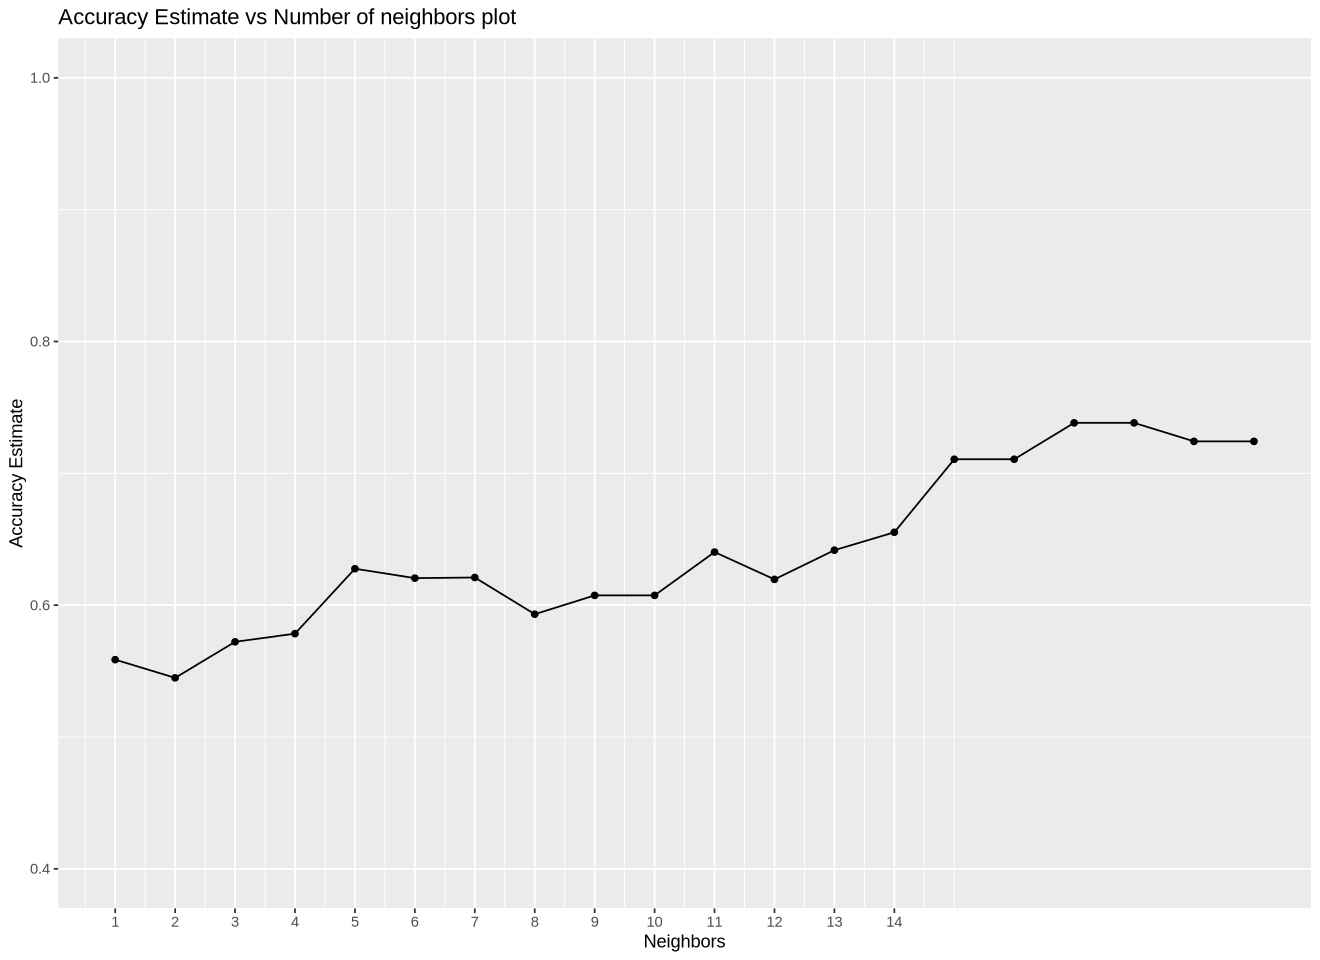

In [53]:

accuracy_versus_k <- ggplot(accuracies, aes(x = neighbors, y = mean))+
       geom_point() +
       geom_line() +
       labs(x = "Neighbors", y = "Accuracy Estimate", title = "Accuracy Estimate vs Number of neighbors plot") +
       scale_x_continuous(breaks = seq(0, 14, by = 1)) +  
       scale_y_continuous(limits = c(0.4, 1.0)) 

accuracy_versus_k


Discussion: 

Our findings show that our model achieved a 71.4% accuracy on the testing set. While this model is not perfect, it shows that age and hours played have some influence on player's likelihood to subscribe. I expected that these two variables would have some influence based off of the plot in figure 1, but I wasn't sure how strong the relationship. This shows that age and hours played are relevant characteristics that should be considered when trying to understand subscription behavior. Since adolescents and young adults spend more time on Minecraft on average they are more likely to be interested in newsletter subscription. This is the particular audience that would be interested in the researchers' study. This analysis can lead to future studies which explore the questions of how 